## Mini-project task with linear regression in multidimensional input space and batch learning ##

Authors: Laura Nilsson & Leo Svanemar
Date: 2023-05-22



In [77]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


**Plot data & divide into test and training**

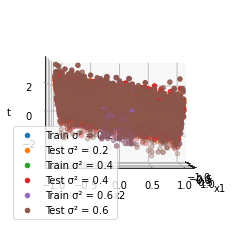

In [78]:
# x1 and x2 are limited to [-1, 1]x[-1, 1] with a step of 0.05
x1 = np.arange(-1, 1.05, 0.05)
x2 = np.arange(-1, 1.05, 0.05)
X1, X2 = np.meshgrid(x1, x2)

# assumed values of weight vector
w = [0, 1.5, -0.8]

# values of data noice, σ2 ∈ {0.2, 0.4, 0.6}
sigma_values_squared = [0.2, 0.4, 0.6]

# set seed for reproducibility, and 42 is the answer to everything :)
np.random.seed(42) 

# plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# divide into training data and test data
training_data = np.logical_or(np.abs(X1) <= 0.3, np.abs(X2) <= 0.3)
test_data = np.logical_or(np.abs(X1) > 0.3, np.abs(X2) > 0.3)

# train on the data
for sigma in sigma_values_squared:
    t = w[0] + w[1] * X1 + w[2] * X2 + np.random.normal(0, sigma, size=X1.shape)
    # train on the training data
    ax.scatter(X1[training_data], X2[training_data], t[training_data], label=f"Train σ² = {sigma}")
    # test on the test data
    #ax.scatter(X1[test_data], X2[test_data], t[test_data], label=f"Test σ² = {sigma}")

# add labels and legend
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('t')
ax.legend()

# change the view angle
ax.view_init(elev=0, azim=0)

plt.show()
